In [1]:
from sys import version_info
version_info

sys.version_info(major=2, minor=7, micro=11, releaselevel='final', serial=0)

In [2]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')

In [3]:
# plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [76]:
#sqqq and tqqq are taken as IBdata feed not for SPXS 
path = '/home/octo/Dropbox/IQ_data/'
spy=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
sqqq= pd.read_csv(path + 'SQQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
tqqq=pd.read_csv(path + 'TQQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
spy=spy.tail(140000)
sqqq=sqqq.tail(140000)
tqqq=tqqq.tail(140000)

In [77]:
spy.tail()

,high,low,open,close,total_volume,volume
2017-02-08 15:59:40,229.21,229.20,229.205,229.200,44140736,50990
2017-02-08 15:59:45,229.21,229.20,229.200,229.205,44172699,31242
2017-02-08 15:59:50,229.21,229.20,229.210,229.210,44207941,34497
2017-02-08 15:59:55,229.22,229.20,229.200,229.220,44317002,108099
2017-02-08 16:00:00,229.27,229.21,229.220,229.260,44676066,356879


In [78]:
#spy['tan']=np.tan(spy.open-spy.close.shift(-1))

## Data Frame data_np

In [86]:
# data set only above the threshold speed of 0.1
data_np=pd.DataFrame(data=spy.open)
data_np['close']=pd.DataFrame(data=spy.close)
data_np['ch']=pd.DataFrame(data=(spy.open-spy.close.shift(-60))).shift(60)
ch1=pd.DataFrame(data=(spy.open-spy.close.shift(-1)))
#speed 
ch2=pd.rolling_sum(pd.DataFrame(data=(spy.open-spy.close.shift(-12))),5)
data_np['speed']=pd.rolling_sum(ch1,60).shift(1)
# angle in absolute and threshold half of max and 0.001
# We need to avoid stiff angle for entry
data_np['angle']=np.arctan2(ch2,1).shift(12)

In [89]:
#data_np.tail()
#data_np['angle'].tail(2000).max()
#data_np['angle'].tail(2000).mean()
#data_np['angle'].tail(2000).min()

In [9]:
#data_np.dropna().head()

In [101]:
# trade signal will be accepted when speed below 0.75 quantile 
"""data_np['speed.9']=pd.rolling_quantile(data_np.speed,12,.9)
data_np['speed.1']=pd.rolling_quantile(data_np.speed,12,.1)
data_np[['speed','speed.9','speed.1']].tail(500).plot(figsize=(16, 10))
plt.show()"""

"data_np['speed.9']=pd.rolling_quantile(data_np.speed,12,.9)\ndata_np['speed.1']=pd.rolling_quantile(data_np.speed,12,.1)\ndata_np[['speed','speed.9','speed.1']].tail(500).plot(figsize=(16, 10))\nplt.show()"

In [102]:
# trade signal will be accepted when angle below 0.75 quantile 
"""data_np['angle.9']=pd.rolling_quantile(data_np.angle,12,.9)
data_np['angle.1']=pd.rolling_quantile(data_np.angle,12,.1)
data_np[['angle','angle.9','angle.1']].tail(500).plot(figsize=(16, 10))
plt.show()"""

"data_np['angle.9']=pd.rolling_quantile(data_np.angle,12,.9)\ndata_np['angle.1']=pd.rolling_quantile(data_np.angle,12,.1)\ndata_np[['angle','angle.9','angle.1']].tail(500).plot(figsize=(16, 10))\nplt.show()"

In [12]:
length=30

In [100]:
P=(spy.high+spy.low+spy.close)/3#P=pd.rolling_mean(P,60)
#data_np['R1']=data_np['P']*2-spy.low
#data_np['R1']=pd.rolling_mean(data_np['R1'], window=12)
data_np['R2']=P+(spy.high-spy.low)
data_np['R2']=pd.rolling_mean(data_np['R2'], window=60)
#data_np['S1']=data_np['P']*2-spy.high
#data_np['S1']=pd.rolling_mean(data_np['S1'], window=12)
data_np['S2']=P-(spy.high-spy.low)
data_np['S2']=pd.rolling_mean(data_np['S2'], window=60)
data_np['vwap'] =pd.rolling_sum(spy.volume*P,length)/pd.rolling_sum(spy.volume,length)
data_np['spread'] =data_np['open'] -data_np['vwap'] 

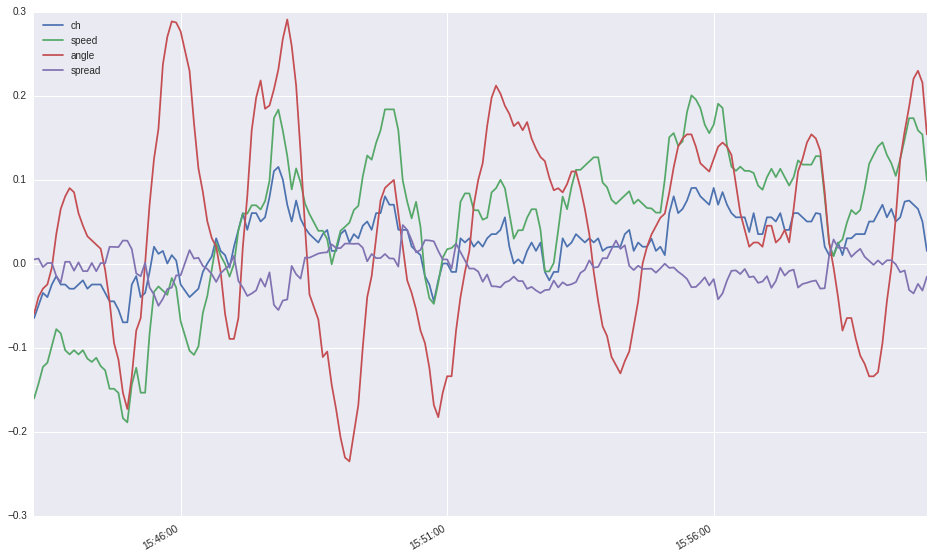

In [115]:
# trade signal will be generated when spread above 0.9 quantile 
#data_np['spread.95']=pd.rolling_quantile(data_np.spread,60,.95)
#data_np['spread.05']=pd.rolling_quantile(data_np.spread,60,.05)
#data_np[['spread','spread.95','spread.05']].tail(500).plot(figsize=(16, 10))
data_np[['ch','speed','angle','spread']].tail(200).plot(figsize=(16, 10))
plt.show()
#data_np[['spread']].tail(2000).plot(figsize=(16, 10))
#plt.xlabel('time')
#plt.ylabel('spread')

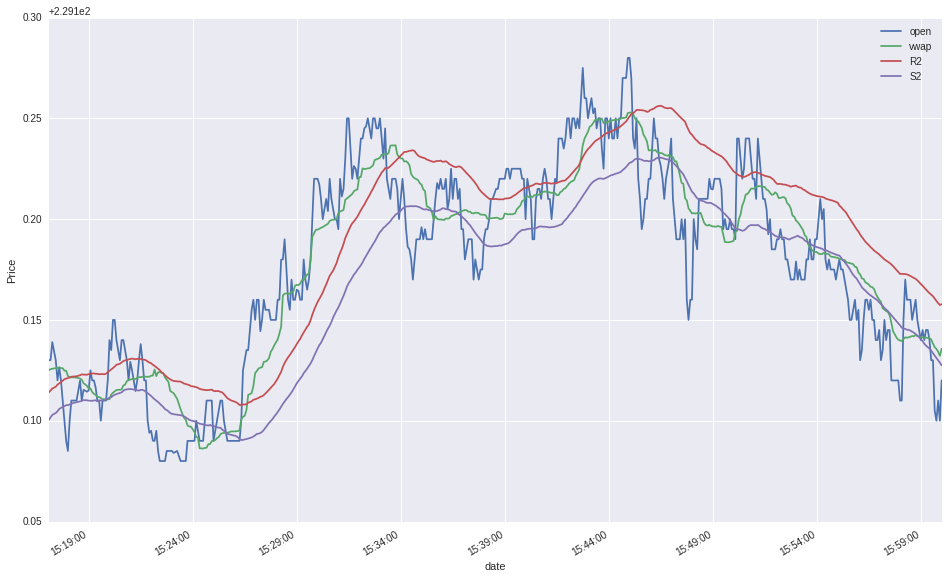

In [128]:
data_np[['open','vwap','R2','S2']].tail(500).plot(figsize=(16, 10))
#data_np[['vwap','open']].tail(100).plot(figsize=(16, 10))
plt.xlabel('date')
plt.ylabel('Price')

In [129]:
data_np.mean(axis=0)

open       226.873958
close      226.873944
ch          -0.001628
speed       -0.000790
angle       -0.001011
speed.9      0.035124
speed.1     -0.048505
R2         226.886518
S2         226.860936
vwap       226.873614
spread       0.000648
ratio        0.456741
ratio_v      0.456232
dtype: float64

In [17]:
#x = np.linspace(-2 * np.pi, 2 * np.pi, 50)
x=spy.open

In [18]:
def f(x):
    return np.sin(x) + 0.5 * x

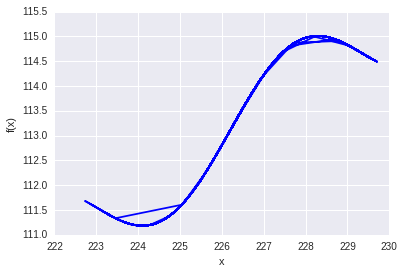

In [19]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [20]:
#data_np.dropna().tail()

In [21]:
df_ratio = pd.DataFrame(data=spy.close)

In [22]:
P_sqqq=(sqqq.high+sqqq.low+sqqq.close)/3#P=pd.rolling_mean(P,60)
df_ratio['vwap_s'] =pd.rolling_sum(sqqq.volume*P_sqqq,60)/pd.rolling_sum(sqqq.volume,60)
P_tqqq=(tqqq.high+tqqq.low+tqqq.close)/3#P=pd.rolling_mean(P,60)
df_ratio['vwap_t'] =pd.rolling_sum(tqqq.volume*P_tqqq,60)/pd.rolling_sum(tqqq.volume,60)

In [23]:
df_ratio['sqqq'] = pd.DataFrame(data=sqqq.close)
df_ratio['tqqq']= pd.DataFrame(data=tqqq.close)
df_ratio['ratio']=df_ratio.sqqq/df_ratio.tqqq
df_ratio['ratio_v']=df_ratio.vwap_s/df_ratio.vwap_t
#df_ratio['mean'] = pd.rolling_mean(df_ratio.ratio,60)
#df_ratio['mean_v'] = pd.rolling_mean(df_ratio.ratio_v,60)
df_ratio=df_ratio.dropna()

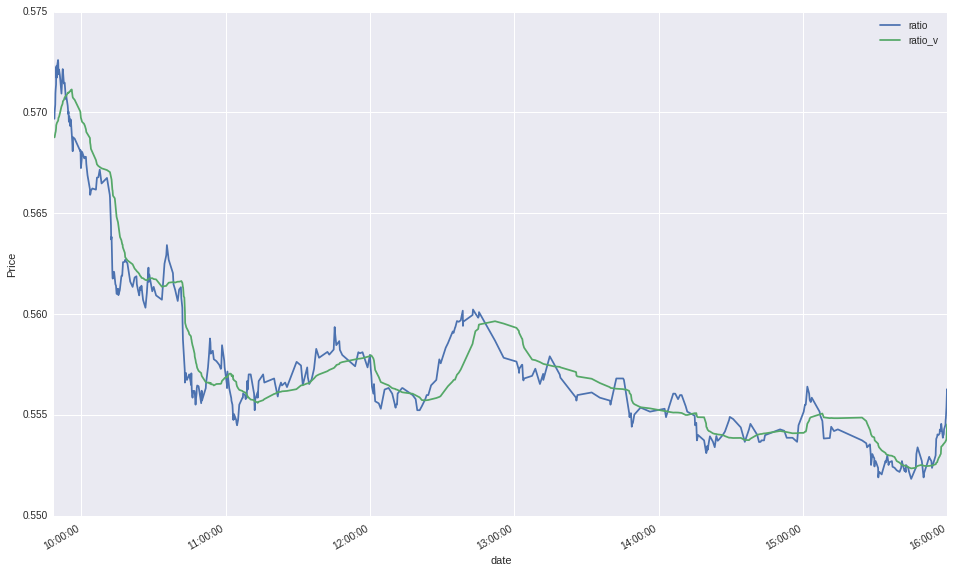

In [130]:
#data_np[['ratio','ratio_v']].tail(500).plot(figsize=(16, 10))
df_ratio[['ratio','ratio_v']].tail(500).plot(figsize=(16, 10))
#data_np[['vwap','open']].tail(100).plot(figsize=(16, 10))
plt.xlabel('date')
plt.ylabel('Price')

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [26]:
spy['p60']=pd.DataFrame(data=spy.close.shift(-60))
spy=spy.dropna()

In [27]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(pd.DataFrame(spy.p60),pd.DataFrame(spy.open))
pr=regr.predict(pd.DataFrame(spy.p60))

In [28]:
data_np=data_np.tail(139940)

In [29]:
len(pr)

139940

In [30]:
len(data_np.open.dropna())

139940

In [146]:
data_np['pr']=pr

ValueError: Length of values does not match length of index

In [145]:
data_np['err']=data_np.pr-spy.close.shift(-1)

AttributeError: 'DataFrame' object has no attribute 'pr'

In [56]:
data_np['Volatility']=data_np['close'].apply(lambda x: np.log(x))/pd.rolling_std(data_np['close'],40)

In [57]:
#pd.DataFrame.hist(data_np, figsize = [10,10]);

In [144]:
data_np[['err','ch']].tail(500).plot(figsize=(16, 10))
#data_np[['vwap','open']].tail(100).plot(figsize=(16, 10))
plt.xlabel('date')
plt.ylabel('Price')

KeyError: "['err'] not in index"

In [132]:
#https://mrjbq7.github.io/ta-lib/func.html
#https://github.com/parthasen/ALGO/blob/MIX/TA.py
#TA.py for self made technical analysis 
import talib

## Data Frame df_svm

In [142]:
df_svm=pd.DataFrame(data=spy.open)
df_svm['close']=pd.DataFrame(data=spy.close)
df_svm['ch']=pd.DataFrame(data=(spy.open-spy.close.shift(-60))).shift(60)
ch1=pd.DataFrame(data=(spy.open-spy.close.shift(-1)))
ch2=pd.rolling_sum(pd.DataFrame(data=(spy.open-spy.close.shift(-12))),5)
df_svm['ju'] = np.where(pd.rolling_sum(pd.DataFrame(data=(spy.open-spy.close.shift(-12))),15).shift(12)>0.10,1,0)
df_svm['ju'] = np.where(df_svm['ju'].shift(-1)==df_svm['ju'],0,1)
df_svm['jd'] = np.where(pd.rolling_sum(pd.DataFrame(data=(spy.open-spy.close.shift(-1))),15).shift(1)<-0.10,-1,0)
df_svm['jd'] = np.where(df_svm['jd'].shift(-1)==df_svm['jd'],0,1)
df_svm['speed']=pd.rolling_sum(ch1,60).shift(1)
df_svm['angle']=np.arctan2(ch2,1).shift(12)
df_svm['tan']=np.tan(df_svm['ch'])
df_svm['vol_u']=np.where(pd.DataFrame(data=spy.volume>pd.rolling_mean(spy.volume,180)),1,0)
df_svm['vol_d']=np.where(pd.DataFrame(data=spy.volume<pd.rolling_mean(spy.volume,180)),-1,0)
df_svm['ret_p'] = np.where(pd.DataFrame(data=(spy.open/spy.close.shift(-1))-1)>0.0001,1,0)
df_svm['ret_n'] = np.where(pd.DataFrame(data=(spy.open/spy.close.shift(-1))-1)<-0.0001,-1,0)
df_svm['Volti']=df_svm['close'].apply(lambda x: np.log(x))/pd.rolling_std(df_svm['close'],40)
P=(spy.high+spy.low+spy.close)/3
df_svm['R2']=P+(spy.high-spy.low)
df_svm['R2']=pd.rolling_mean(df_svm['R2'], window=60)
df_svm['S2']=P-(spy.high-spy.low)
df_svm['S2']=pd.rolling_mean(df_svm['S2'], window=60)
df_svm['vwap'] =pd.rolling_sum(spy.volume*P,length)/pd.rolling_sum(spy.volume,length)
df_svm['spread'] =df_svm['open'] -df_svm['vwap'] 

In [143]:
df_svm.tail()

,open,close,ch,ju,jd,speed,angle,tan,vol_u,vol_d,ret_p,ret_n,Volti,R2,S2,vwap,spread
2017-02-08 15:59:40,229.205,229.200,0.075,0,0,0.1730,0.186507,0.075141,1,0,0,0,341.940497,229.260585,229.232278,229.236493,-0.031493
2017-02-08 15:59:45,229.200,229.205,0.070,1,0,0.1730,0.220077,0.070115,1,0,0,0,328.607185,229.259418,229.231112,229.235589,-0.035589
2017-02-08 15:59:50,229.210,229.210,0.065,0,0,0.1585,0.229485,0.065092,1,0,0,0,322.581886,229.258304,229.229998,229.234231,-0.024231
2017-02-08 15:59:55,229.200,229.220,0.050,0,0,0.1535,0.215215,0.050042,1,0,0,-1,321.685578,229.257416,229.228776,229.232213,-0.032213
2017-02-08 16:00:00,229.220,229.260,0.015,1,1,0.0985,0.153679,0.015001,1,0,0,0,318.594155,229.257777,229.227470,229.235669,-0.015669
